In [66]:
"""
Q1. Data Labeling and Preprocessing (30 Marks)
------------------------------------------------
Q1(a) [Theory – 10 Marks]
--------------------------
Answer the following theoretical questions using concise and insightful explanations
written in your own words. Each question should be answered in 2–3 bullet points:

"""

'\nQ1. Data Labeling and Preprocessing (30 Marks)\n------------------------------------------------\nQ1(a) [Theory – 10 Marks]\n--------------------------\nAnswer the following theoretical questions using concise and insightful explanations\nwritten in your own words. Each question should be answered in 2–3 bullet points:\n\n'

In [67]:
"""
1. Can the problem of detecting network intrusions be treated as a classification task, a
clustering task, or both? Provide justification based on how labeled data and patterns of
behavior influence model choice.

Answer:
-------
Intrusion detection system: 
Software application to detect network intrusion using various machine learning algorithms

Classification task(Supervised learning):
In the provided set of data, where intrusions are already labeled (Eg. malware, DDoS attacks etc.), 
as supervised classifier (Eg. Random forest, SVM, Neural Networks etc.) we can train the model to 
distinguish between normal and malicious traffics

Clustering task (Unsupervised learning):
Intrusion detection systems (IDS) aims at gaining insihgts from unlabelled data points 
use clustering (Eg. K-means, DBSCAN) or anomaly detection (Eg. Isolation forest, Autoencoders) 
to identify the unusual behavior.

In the case of attacks are well-documented and labelled - Classification is preferrable
If the attacks are evolving or unknown - Clustering is necessary
In general and real world scenarios, hybrid approach is useful, since networks face both known and unknown threats

"""

'\n1. Can the problem of detecting network intrusions be treated as a classification task, a\nclustering task, or both? Provide justification based on how labeled data and patterns of\nbehavior influence model choice.\n\nAnswer:\n-------\nIntrusion detection system: \nSoftware application to detect network intrusion using various machine learning algorithms\n\nClassification task(Supervised learning):\nIn the provided set of data, where intrusions are already labeled (Eg. malware, DDoS attacks etc.), \nas supervised classifier (Eg. Random forest, SVM, Neural Networks etc.) we can train the model to \ndistinguish between normal and malicious traffics\n\nClustering task (Unsupervised learning):\nIntrusion detection systems (IDS) aims at gaining insihgts from unlabelled data points \nuse clustering (Eg. K-means, DBSCAN) or anomaly detection (Eg. Isolation forest, Autoencoders) \nto identify the unusual behavior.\n\nIn the case of attacks are well-documented and labelled - Classification i

In [68]:
"""
2. In machine learning for security, datasets sometimes contain localized or
environment-specific features such as fixed IP addresses, hostnames, or port numbers.
What are the risks of including such features in your model, and how might it affect
generalization to other systems or networks?

Answer:
-------
Risks of including localized or environment-specific features affecting generalization:

1) Model may learn patterns (and Overfits) specific to the training environment (associating certain IPs or 
host names with attacks) with malicious or benign behavior. It may lead to poor performance or 
incorrect predictions when deployed in a different network.

2) When the model associates malicious activity with specific IPs or Ports (known infrastrcture) 
from the training set, it may fail to detect same attack pattersn in new environment with 
different addressing schemes.
(To avoid, test the model on datasets from different networks to ensure it generalizes)

3) Chances of bypassing the model by modifying hostnames or IP address or hosts, while keeping the attack
methodology intact. For example, incase model flags traffic to IP address_1: 192.168.1.00:2222, 
to evade the detection, attacker may simply switch to IP addresss_2: 192.168.1.01:3333.
(To avoid, make the model robust across different network environments).

4) Since different networks use different IP ranges/internal Hostnames/Ports, models trained in a environment 
(or organization) specific artefacts tend to fail (or may not fit well) in new network or different configurations.
(To avoid, introduce variability in IPs, hostnames, ports while training and force the model to learn 
invariant attack patterns).

5) Hardcoding of internal IPs/host names in the training data, might lead to leak/expose sensitive information
about Organization network architecture, if the model is shared or reverse-engineered.
(To avoid, replace IPs with network segments or categorical labels, host names with role-based tags, 
Port numbers with service-types).

"""

'\n2. In machine learning for security, datasets sometimes contain localized or\nenvironment-specific features such as fixed IP addresses, hostnames, or port numbers.\nWhat are the risks of including such features in your model, and how might it affect\ngeneralization to other systems or networks?\n\nAnswer:\n-------\nRisks of including localized or environment-specific features affecting generalization:\n\n1) Model may learn patterns (and Overfits) specific to the training environment (associating certain IPs or \nhost names with attacks) with malicious or benign behavior. It may lead to poor performance or \nincorrect predictions when deployed in a different network.\n\n2) When the model associates malicious activity with specific IPs or Ports (known infrastrcture) \nfrom the training set, it may fail to detect same attack pattersn in new environment with \ndifferent addressing schemes.\n(To avoid, test the model on datasets from different networks to ensure it generalizes)\n\n3) Cha

In [69]:
"""
Q1(b) [Coding – 20 Marks]
--------------------------
You are provided with a dataset named 'data.csv' which contains flow-level network
traffic information. Each row represents a communication flow characterized by source
and destination IPs, ports, protocol, and other attributes. However, this data is unlabeled.
Your task is to label the data using the following IP heuristics:
- If either the source or destination IP address appears in a known list of attacker IPs,
assign the label 1 (attack).
- If either the source or destination IP address appears in a list of benign IPs, assign the
label 0 (benign).
- If the IPs are not found in either list, the row should be discarded.
Once labeling is complete, remove the columns that were only used for labeling and are
not needed for model training. Specifically, remove the columns: FLowStartTimestamp,
SrcIP, DstIP, SrcPort, DstPort, and Protocol.
Save the resulting labeled and cleaned dataset to a file named 'complete_data.csv'. Also,
print the count of attack-labeled and benign-labeled flows, and display the first few rows
of the final processed dataset.

Attack IPs:
------------
●
192.168.1.64, 192.168.1.65, 192.168.1.66, 192.168.1.67

Benign IPs:
------------
●
192.168.2.83, 192.168.2.183, 192.168.1.68
"""

"\nQ1(b) [Coding – 20 Marks]\n--------------------------\nYou are provided with a dataset named 'data.csv' which contains flow-level network\ntraffic information. Each row represents a communication flow characterized by source\nand destination IPs, ports, protocol, and other attributes. However, this data is unlabeled.\nYour task is to label the data using the following IP heuristics:\n- If either the source or destination IP address appears in a known list of attacker IPs,\nassign the label 1 (attack).\n- If either the source or destination IP address appears in a list of benign IPs, assign the\nlabel 0 (benign).\n- If the IPs are not found in either list, the row should be discarded.\nOnce labeling is complete, remove the columns that were only used for labeling and are\nnot needed for model training. Specifically, remove the columns: FLowStartTimestamp,\nSrcIP, DstIP, SrcPort, DstPort, and Protocol.\nSave the resulting labeled and cleaned dataset to a file named 'complete_data.csv'

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load input data log
#data_log = "Assignment_I/data/InputData/data.csv"
data_log = "data.csv"
df = pd.read_csv(data_log)


# Consolidating IP address of both attacker & benign
ips_attack = {"192.168.1.64", "192.168.1.65", "192.168.1.66", "192.168.1.67"}
ips_benign = {"192.168.2.83", "192.168.2.183", "192.168.1.68"}


#Seggregation of attacker IP address as Label as "1" & benign IP address as Label "0"
def label_data(row):
    src_ip = row["SrcIP"]
    dest_ip = row['DstIP']
    if src_ip in ips_attack or dest_ip in ips_attack:
        return 1
    elif src_ip in ips_benign or dest_ip in ips_benign:
        return 0
    else:
        return None

df["Label"] = df.apply(label_data, axis=1)

#Removal of rows apart from either attacker or benign   
df = df.dropna(subset=["Label"])


# Removal of columns that not needed for model training. Specifically, remove the columns: FLowStartTimestamp,
# SrcIP, DstIP, SrcPort, DstPort, and Protocol.
removal_of_columns = ["FLowStartTimestamp","SrcIP", "DstIP", "SrcPort", "DstPort", "Protocol"]

df_removed = df.drop(columns=removal_of_columns)


# Save the resulting labeled and cleaned dataset to a file named 'complete_data.csv'.
df_removed.to_csv("complete_data.csv", index=False)


# Print the count of attack-labeled and benign-labeled flows
label_count = df_removed["Label"].value_counts()
print("Labels counted:")
print(label_count)


# Display the first few rows of the final processed dataset.
print("\nFirst few rows of the cleaned dataset:")
print(df_removed.head())


Labels counted:
1.0    43731
0.0    26624
Name: Label, dtype: int64

First few rows of the cleaned dataset:
   FlowDuration  FlowPacketCount  ForwardPacketCount  BackwardPacketCount  \
0     43.511605             1361                 512                  849   
1      0.034274                5                   5                    0   
2     44.330333             1598                 597                 1001   
3      0.143714                7                   6                    1   
4      0.396714                2                   1                    1   

   FlowPayloadBytesSum  ForwardPayloadBytesSum  BackwardPayloadBytesSum  \
0              1154430                   20446                  1133984   
1                   30                      30                        0   
2              1168370                   34386                  1133984   
3                  194                     194                        0   
4                    6                       0        

In [71]:
"""
Q2. Dimensionality Reduction with PCA (30 Marks)
-------------------------------------------------
Q2(a) [Theory – 10 Marks]
--------------------------
In the context of machine learning, and particularly for tasks like intrusion detection,
explain why dimensionality reduction techniques like Principal Component Analysis
(PCA) are used. Your answer should highlight the goals and benefits of PCA in terms of
improving model performance, removing noise, and aiding visualization. Provide at least
two specific advantages of applying PCA before model training.

Answer:
-------

Intrusion detection, is the identification of malicious activities in a given network by analyzing its traffic.

Dimentionality reduction, helps to reduce the number of features while retaining key information.
Techniques like principal component analysis (PCA), singular value decomposition (SVD), 
linear discriminant analysis (LDA) convert data into a lower-dimensional space while preserving important details.

PCA has been used predominantly in the field of traffic analysis and one of most powerful tool 
in the data analysis tool kit. 
A statistical method that transforms high dimensional data into a smaller set of uncorrelated variables 
(principal components) while preserving the most significant variation in the data.
It generates new features which are linear combination of the initial features.

Goals and benefits of PCA:
---------------------------
1) The key idea behind PCA is to reduce the number of features in a dataset while preserving its overall
structure and patterns. Making it easier to analyze, visualize and run machine learning algorithms
without the risk of overfitting or excessive computational costs.

2) Effective when dealing with highly correlated features as it combines them into fewer, independent components
that captures the essence of the data. This technique is widely used in exploratry data analysis,
noise reduction and improving model performance in machine learning.

3) Improving model performance, reduces computational complexity and enhance model efficiency without losing
critical information. It helps to acheive faster training, mitigates overfitting and better generatlization.

4) Removing noise and redundancy, and retains meaningful patterns, 
It identifies and discards less important variantions (noise). Helps to achieve denoising data,
eleminates correlated features, focus on signal (improves signal-to-noise ratio)

5) Aiding visualization, project high dimensional data into 2D/3D for interoperatbility.
It helps to achieve human-interpretable insights, exploratory data analysis (EDA) (class separability, grouping),
communicability (simplifies presenting trends to non-techincal stake-holders)

Advantages of applying PCA before model training:
-------------------------------------------------
1) Multicollinearity handling - Creates new uncorrelated variables to address when original features are 
highly correlated. 

2) Data commpression - represents data with fewer components reduces the storage needs and helps to
speeding up the processing. Condenses the data into fewer, more meaningful features, improving detection accuracy.
Outlier detection - Identifies unusual data points by showing which ones deviate significantly 
in the reduced space. Helps to preventing models like logistic regression from being mislead by redundant signals.

"""

'\nQ2. Dimensionality Reduction with PCA (30 Marks)\n-------------------------------------------------\nQ2(a) [Theory – 10 Marks]\n--------------------------\nIn the context of machine learning, and particularly for tasks like intrusion detection,\nexplain why dimensionality reduction techniques like Principal Component Analysis\n(PCA) are used. Your answer should highlight the goals and benefits of PCA in terms of\nimproving model performance, removing noise, and aiding visualization. Provide at least\ntwo specific advantages of applying PCA before model training.\n\nAnswer:\n-------\n\nIntrusion detection, is the identification of malicious activities in a given network by analyzing its traffic.\n\nDimentionality reduction, helps to reduce the number of features while retaining key information.\nTechniques like principal component analysis (PCA), singular value decomposition (SVD), \nlinear discriminant analysis (LDA) convert data into a lower-dimensional space while preserving impor

In [72]:
"""
Q2(b) [Coding – 20 Marks]
--------------------------
Using the cleaned and labeled dataset generated in Q1(b), carry out the following steps:
- Separate the features from the label column.
- Perform a train-test split of the dataset in a 70:30 ratio.
- Normalize or standardize the feature values using a suitable scaling method to ensure
fair contribution of all features.
- Apply PCA to reduce the dimensionality of the training features to two components,
and apply the same transformation to the test set.
- Plot a 2D scatter plot of the PCA-transformed training data using distinct colors for
different classes.
- Print the explained variance ratio of the two principal components.

"""

'\nQ2(b) [Coding – 20 Marks]\n--------------------------\nUsing the cleaned and labeled dataset generated in Q1(b), carry out the following steps:\n- Separate the features from the label column.\n- Perform a train-test split of the dataset in a 70:30 ratio.\n- Normalize or standardize the feature values using a suitable scaling method to ensure\nfair contribution of all features.\n- Apply PCA to reduce the dimensionality of the training features to two components,\nand apply the same transformation to the test set.\n- Plot a 2D scatter plot of the PCA-transformed training data using distinct colors for\ndifferent classes.\n- Print the explained variance ratio of the two principal components.\n\n'

Benign samples (0): total  26624
Attack samples (1): total  43731


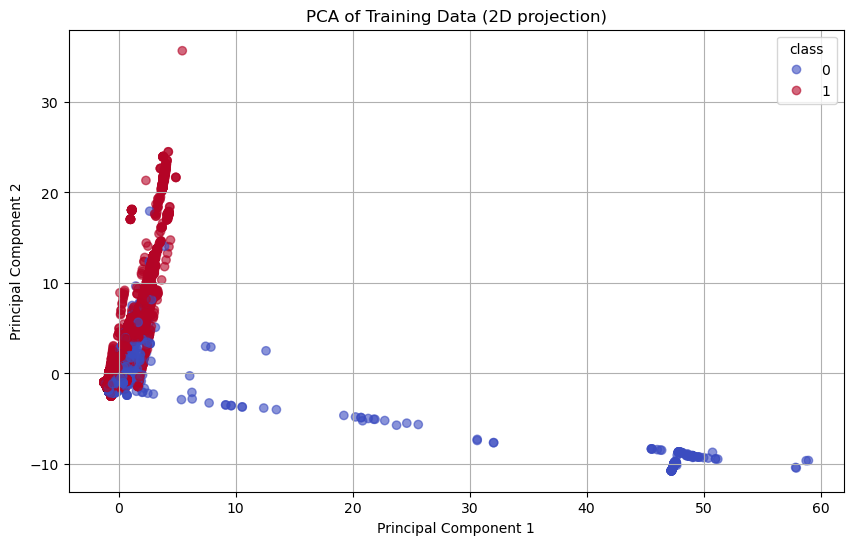

Explained Variance Ratio: [0.29752403 0.23050653]
Total Explained Variance: 0.5280305627588056


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load input data
data_log_1 = "complete_data.csv"
df_1 = pd.read_csv(data_log_1)


# Separation of features from the label column
x = df_1.drop(columns=["Label"])
y = df_1["Label"]


# Perform a train-test split of the dataset in a 70:30 ratio.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

col_list = x_train.columns
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print('Benign samples (0): total ', np.bincount(y)[0])
print('Attack samples (1): total ', np.bincount(y)[1])


# Normalize or standardize the feature values using a suitable scaling method to ensure
# fair contribution of all features.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Apply PCA to reduce the dimensionality of the training features to two components,
# and apply the same transformation to the test set.
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
#print("Explained variance ratio:", explained_variance)

# Plot a 2D scatter plot of the PCA-transformed training data using distinct colors for different classes.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6 )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Data (2D projection)')
plt.legend(*scatter.legend_elements(), title="class")
plt.grid(True)
plt.tight_layout
plt.show()

# Print the explained variance ratio of the two principal components.
# (Variance in the dataset captured by Principal Component 1 & 2)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Together Principal Component 1 & 2, explains about the total variance in the original dataset.
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))


In [74]:
"""
Q3. Classification and Evaluation (40 Marks)
---------------------------------------------
Q3(a) [SVM Classifier – 10 Marks]
----------------------------------
Train a Support Vector Machine (SVM) classifier using the PCA-transformed training
dataset obtained in Q2(b). After training, use the model to make predictions on the test
data and evaluate its performance by computing the following metrics: Accuracy,
Precision, Recall, and F1-score.


"""

'\nQ3. Classification and Evaluation (40 Marks)\n---------------------------------------------\nQ3(a) [SVM Classifier – 10 Marks]\n----------------------------------\nTrain a Support Vector Machine (SVM) classifier using the PCA-transformed training\ndataset obtained in Q2(b). After training, use the model to make predictions on the test\ndata and evaluate its performance by computing the following metrics: Accuracy,\nPrecision, Recall, and F1-score.\n\n\n'

Model Evaluation Metrics:
Accuracy: 0.8015
Precision: 0.8392
Recall: 0.8420
F1_score: 0.8406


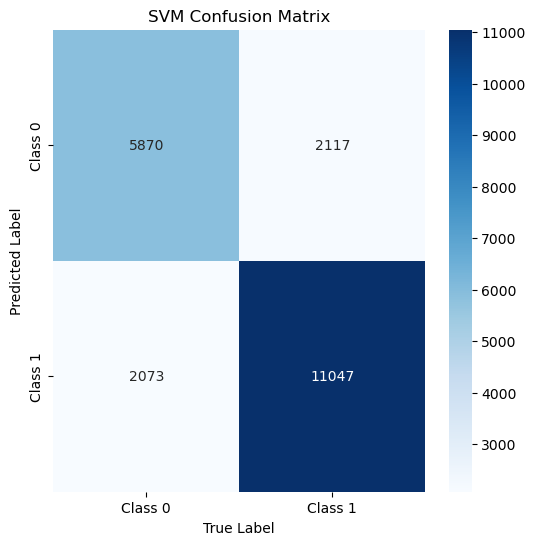

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Train a Support Vector Machine (SVM) classifer using the PCA-transformed training 
# dataset obtained in Q2(b)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(x_train_pca, y_train)

# Make predictions one the test data
y_pred_svm = svm.predict(x_test_pca)

# Evaluate its performance by computing the following metrics:
# Accuracy, Precision, Recall, and F1-score
# Accuracy (represents fraction of correct classification) 
# = (TP + TN)/(TP + FN + FP + TN)
# Precision (how many of the predictions for a class are actually that class) 
# = TP/(TP + FP)
# Recall (how many true positives were recovered)
# = TP/(TP + FN)
# F1 (gemoetric average of precision and recall) 
# = 2 x (Precision x Recall)/(Precision + Recall)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print the above metrics info
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1_score: {f1_svm:.4f}")

# Plot confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('SVM Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()


In [76]:
"""
Q3(b) [Random Forest Classifier – 10 Marks]
--------------------------------------------
Train a Random Forest classifier on the same PCA-transformed training dataset. Evaluate
its performance using the same four metrics: Accuracy, Precision, Recall, and F1-score.
This will allow comparison with the SVM model trained earlier.

"""

'\nQ3(b) [Random Forest Classifier – 10 Marks]\n--------------------------------------------\nTrain a Random Forest classifier on the same PCA-transformed training dataset. Evaluate\nits performance using the same four metrics: Accuracy, Precision, Recall, and F1-score.\nThis will allow comparison with the SVM model trained earlier.\n\n'

Random Forest Evaluation Metrics:
Accuracy: 0.9791
Precision: 0.9815
Recall: 0.9849
F1_score: 0.9832


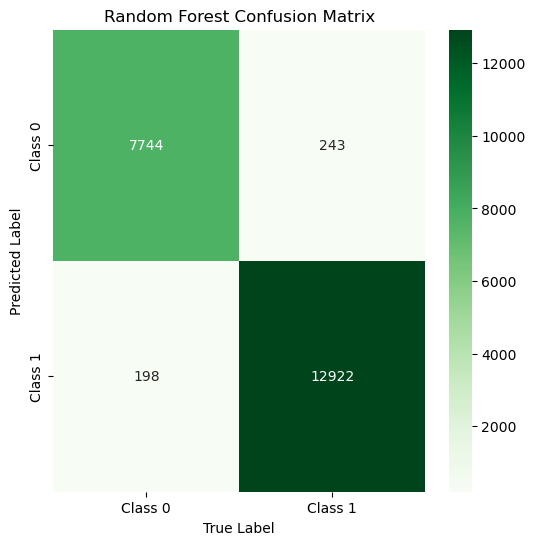

In [77]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier on the same PCA-transformed training dataset.
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(x_train_pca, y_train)

# Make predictions one the test data
y_pred_rf = rf.predict(x_test_pca)

# Evaluate its performance by computing the following metrics:
# Accuracy, Precision, Recall, and F1-score
# Accuracy = (TP + TN)/(TP + FN + FP + TN)
# Precision = TP/(TP + FP)
# Recall = TP/(TP + FN)
# F1 = 2 x (Precision x Recall)/(Precision + Recall)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the above metrics info
print("Random Forest Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1_score: {f1_rf:.4f}")

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [78]:
"""
Q3(c) [Evaluation and Interpretation – 20 Marks]
-------------------------------------------------
1. Plot and display the confusion matrices for both the SVM and Random Forest
classifiers trained in Q3(a) and Q3(b).

"""

'\nQ3(c) [Evaluation and Interpretation – 20 Marks]\n-------------------------------------------------\n1. Plot and display the confusion matrices for both the SVM and Random Forest\nclassifiers trained in Q3(a) and Q3(b).\n\n'


----------------------------
Confusion matrix of models
----------------------------
SVM:


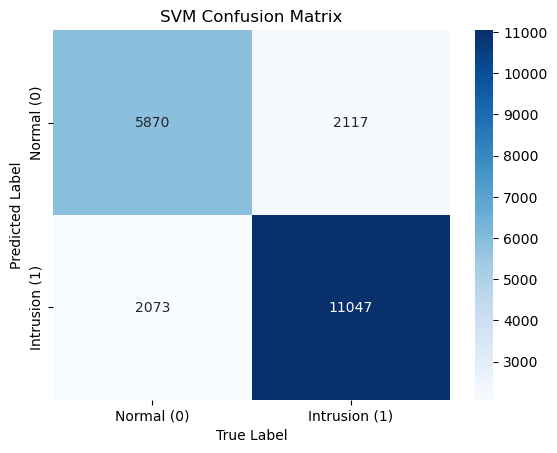


Random Forest:


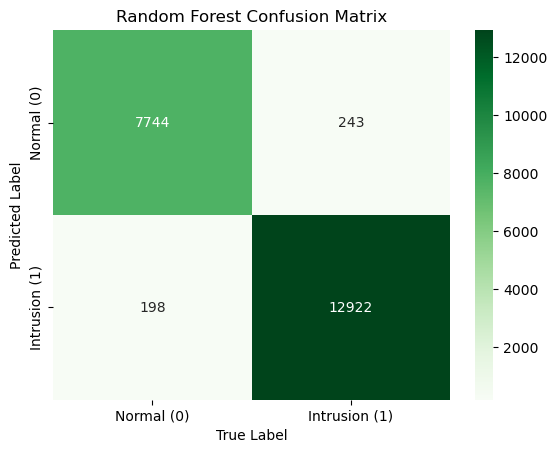


--------------------
Model Comparison:
--------------------
Metric     SVM    Random Forest
Accuracy   0.8015 0.9791
Precision  0.8392 0.9815
Recall     0.8420 0.9849
F1-Score   0.8406 0.9832


In [79]:
# Plot and display the Confusion matrices for both the SVM and Random Forest
# Classifiers trained in Q3(a) and Q3(b)

print("\n----------------------------")
print("Confusion matrix of models")
print("----------------------------")
print("SVM:")
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal (0)', 'Intrusion (1)'], 
            yticklabels=['Normal (0)', 'Intrusion (1)'])
plt.title('SVM Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

print("\nRandom Forest:")
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal (0)', 'Intrusion (1)'], 
            yticklabels=['Normal (0)', 'Intrusion (1)'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

# Comparative analysis
print("\n--------------------")
print("Model Comparison:")
print("--------------------")
print(f"{'Metric':<10} {'SVM':<6} {'Random Forest':<6}")
print(f"{'Accuracy':<10} {accuracy_svm:.4f} {accuracy_rf:.4f}")
print(f"{'Precision':<10} {precision_svm:.4f} {precision_rf:.4f}")
print(f"{'Recall':<10} {recall_svm:.4f} {recall_rf:.4f}")
print(f"{'F1-Score':<10} {f1_svm:.4f} {f1_rf:.4f}")



In [80]:
"""
Question, Q3(c)
-----------------
2. Compare the models based on their confusion matrices and performance metrics. Write
a brief comparison discussing which model performed better and in what way.

Answer:

Accuracy:
Random Forest - comparatively have higher accuracy (97.92%), means it correctly 
classified more instances in overall

Precision (False Alarm Rate):
Random Forest - comparatively have higher precision (98.16%), means it produced
fewer false alarms (misclassified normal traffic as intrusions).
This is better for environments where False alarm costs huge 
(example, security operations)

Recall:
Random Forest - Comparatively have higher recall, means it missed fewer actual intrusions.
This is better for high-security environments, where missing attack is unacceptable.

F1-Score (Balanced Metric):
Random Forest - Comparatively have higher F1-Score, indicating better balance
between Precision and Recall.

In overall Random Forest is performing better in Recall, Precision & F1-score.
It helps to achieve better in Security-critical systems, Operational Efficiency
and Best balanced model.

Note: In general, Random Forest maye be considered when priority is to reduce false alarms
while maintaining decent intrusion detection.
SVM is considered may be when priority is to catch many intrusions as possible,
even at the cost of some false alarms.

"""

'\nQuestion, Q3(c)\n-----------------\n2. Compare the models based on their confusion matrices and performance metrics. Write\na brief comparison discussing which model performed better and in what way.\n\nAnswer:\n\nAccuracy:\nRandom Forest - comparatively have higher accuracy (97.92%), means it correctly \nclassified more instances in overall\n\nPrecision (False Alarm Rate):\nRandom Forest - comparatively have higher precision (98.16%), means it produced\nfewer false alarms (misclassified normal traffic as intrusions).\nThis is better for environments where False alarm costs huge \n(example, security operations)\n\nRecall:\nRandom Forest - Comparatively have higher recall, means it missed fewer actual intrusions.\nThis is better for high-security environments, where missing attack is unacceptable.\n\nF1-Score (Balanced Metric):\nRandom Forest - Comparatively have higher F1-Score, indicating better balance\nbetween Precision and Recall.\n\nIn overall Random Forest is performing better

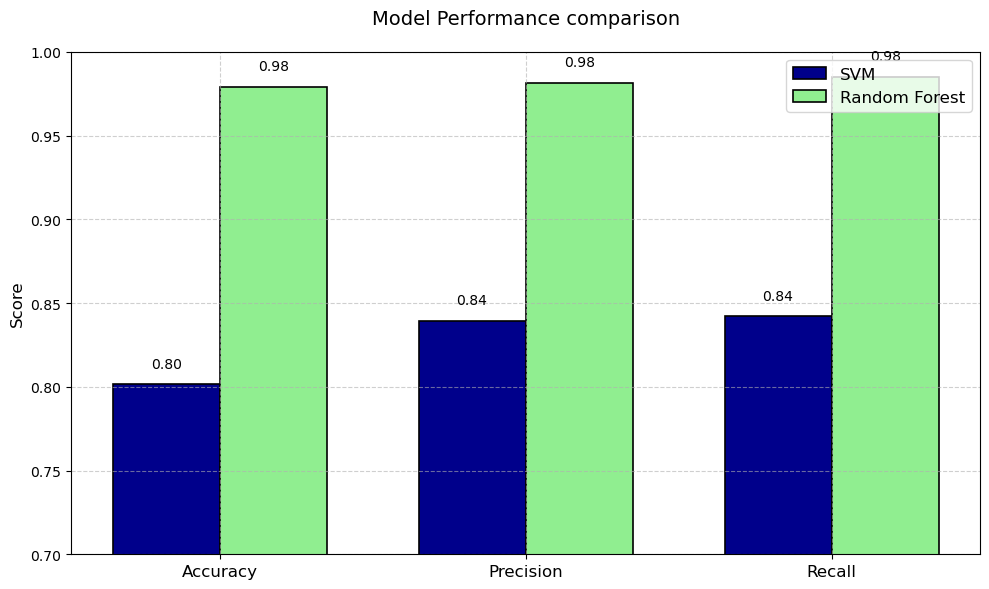

In [81]:
# Metrics Comparison chart
metrics = ['Accuracy', 'Precision', 'Recall']
svm_scores = [accuracy_svm, precision_svm, recall_svm]
rf_scores = [accuracy_rf, precision_rf, recall_rf]

x= np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, svm_scores, width, label='SVM', 
       color='darkblue', edgecolor='black', linewidth=1.2)
ax.bar(x + width/2, rf_scores, width, label='Random Forest', 
       color='lightgreen', edgecolor='black', linewidth=1.2)

ax.set_ylabel('Score', fontsize=12)
ax.set_ylim(0.7, 1.0)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)
plt.title('Model Performance comparison', fontsize=14, pad=20)
ax.grid(True, linestyle='--', alpha=0.6)

for i in range(len(metrics)):
    ax.text(x[i]-width/2, svm_scores[i]+0.01, f'{svm_scores[i]:.2f}',
           ha='center', fontsize=10)
    ax.text(x[i]+width/2, rf_scores[i]+0.01, f'{rf_scores[i]:.2f}',
           ha='center', fontsize=10)
    
plt.tight_layout()
plt.show()

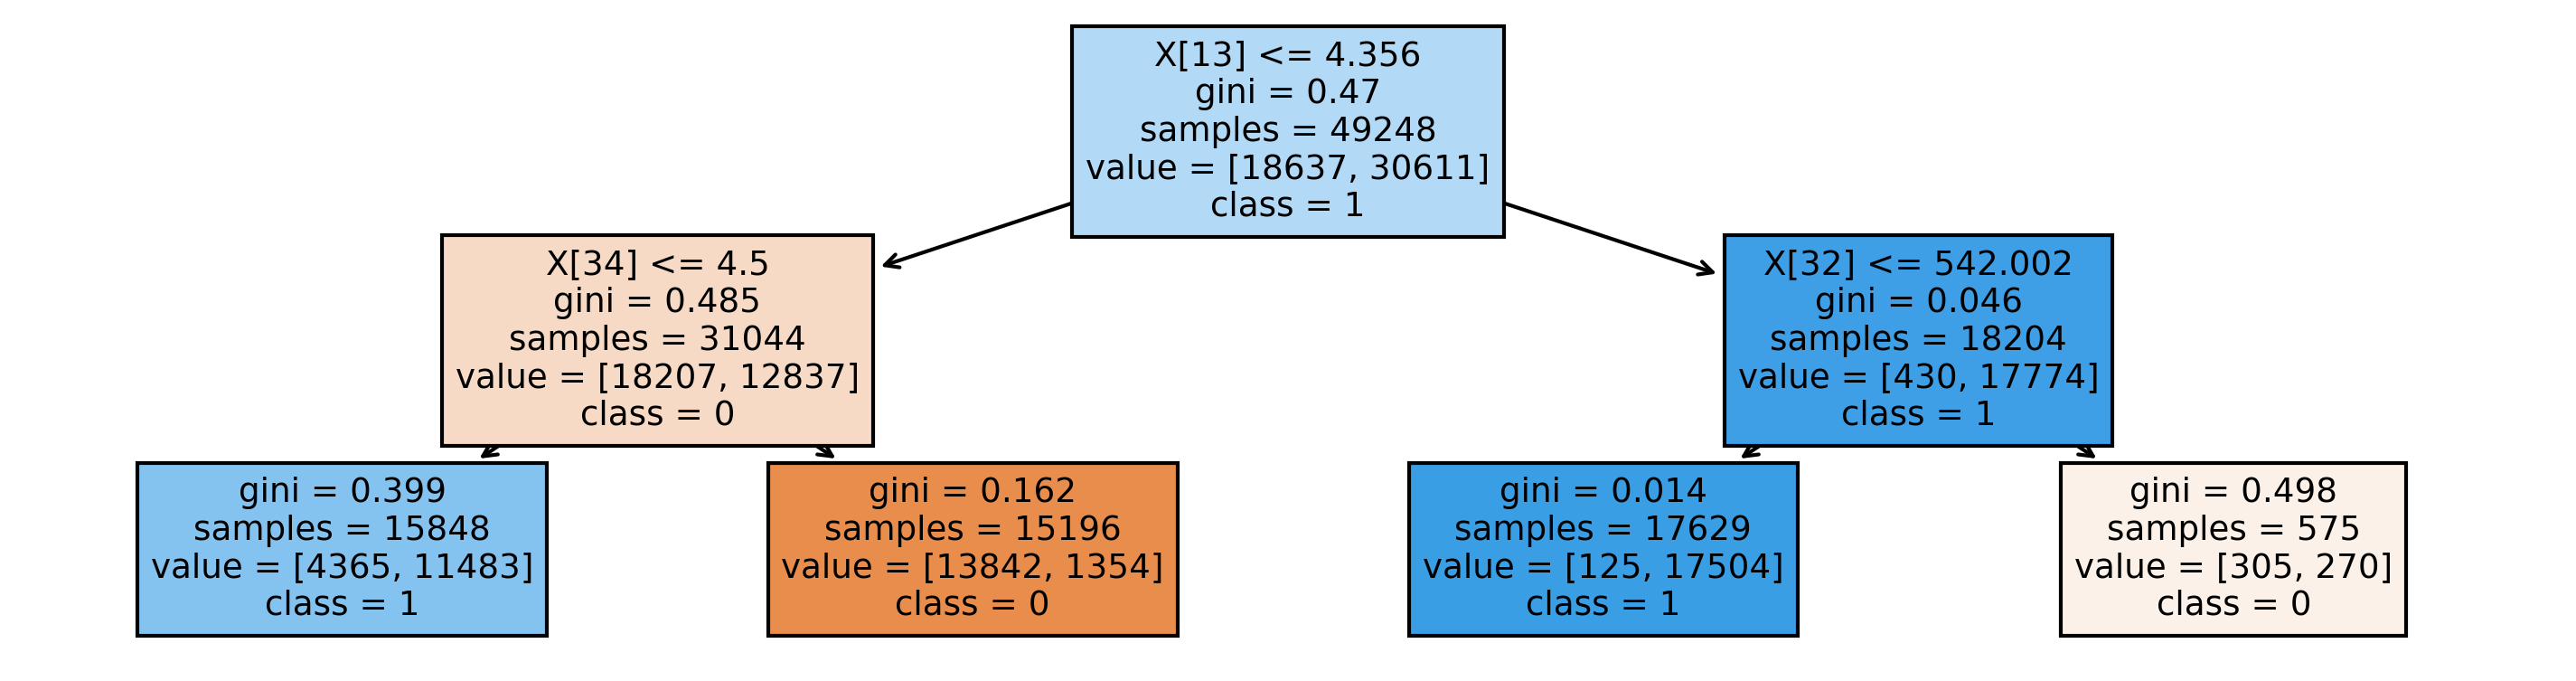

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

d_tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1).fit(x_train, y_train)
y_pred = d_tree.predict(x_test).reshape(-1, 1)
y_true = y_test

plt.figure(figsize=(12,3), dpi=300)
#tree.plot_tree(d_tree, feature_names=feat_list, class_names=['0', '1'], filled=True)
tree.plot_tree(d_tree, class_names=['0', '1'], filled=True)

plt.show()

In [83]:
"""
Question, Q3(c):
-----------------
3. In your own words, define sensitivity and specificity. Explain their relevance in the
context of intrusion detection systems. Also describe how these metrics are derived from
the confusion matrix and why they are important for evaluating model effectiveness in
high-risk environments.

Answer:
-------

Sensitivity (Recall/True Positive Rate): (TP/(TP + FN))
----------------------------------------
Measures the proportion of actual intrusions correctly identified
In Intrusion Detection Systems, able to detect real attacks (missed attacks are dangerous)

Specificity (True Negative Rate): (TN/(TN + FP))
----------------------------------
Measures the proportion of normal traffic correctly identified
In Intrusion Detection Systems, able to avoid false alarms (which could wate our resources)

Importance in Intrusion Detection Systems:
-------------------------------------------
1) Referring High-Rish environments, to prevent undetected breaches Sensitivity 
maximization is mandatory & to avoid alert fatigue Specificity should be reasonable

2) Increasing Sensitivity often decreases Specificity, so the optimal balance 
depends upon the security & operational policies

3) Minimum detection rates (Sensitivity) are required in most of the standards,
Apart from this, False positive rates (1-Specificity) affects operational costs

"""

'\nQuestion, Q3(c):\n-----------------\n3. In your own words, define sensitivity and specificity. Explain their relevance in the\ncontext of intrusion detection systems. Also describe how these metrics are derived from\nthe confusion matrix and why they are important for evaluating model effectiveness in\nhigh-risk environments.\n\nAnswer:\n-------\n\nSensitivity (Recall/True Positive Rate): (TP/(TP + FN))\n----------------------------------------\nMeasures the proportion of actual intrusions correctly identified\nIn Intrusion Detection Systems, able to detect real attacks (missed attacks are dangerous)\n\nSpecificity (True Negative Rate): (TN/(TN + FP))\n----------------------------------\nMeasures the proportion of normal traffic correctly identified\nIn Intrusion Detection Systems, able to avoid false alarms (which could wate our resources)\n\nImportance in Intrusion Detection Systems:\n-------------------------------------------\n1) Referring High-Rish environments, to prevent unde

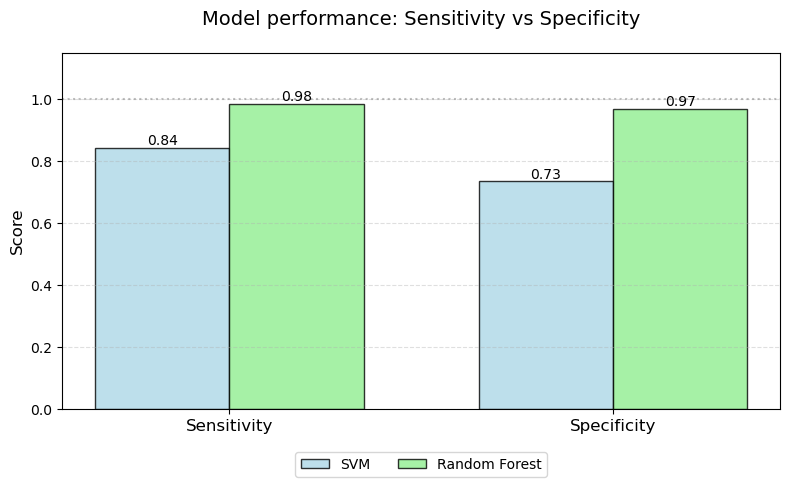

In [84]:
tn_svm, fp_svm, fn_svm, tp_svm = cm_svm.ravel()
sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)

tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
sensitivity_rf = tp_rf / (tp_rf + fn_rf)
specificity_rf = tn_rf / (tn_rf + fp_rf)

plt.figure(figsize=(8, 5))

x = np.arange(2)
width = 0.35

bars1 = plt.bar(x - width/2, [sensitivity_svm, specificity_svm], width,
               label='SVM', color='lightblue', edgecolor='black', alpha=0.8)
bars2 = plt.bar(x + width/2, [sensitivity_rf, specificity_rf], width,
               label='Random Forest', color='lightgreen', edgecolor='black', alpha=0.8)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=10)
        
plt.xticks(x, ['Sensitivity', 'Specificity'], fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model performance: Sensitivity vs Specificity', fontsize=14, pad=20)
plt.ylim(0, 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=10)
plt.tight_layout()

plt.axhline(y=1.0, color='gray', linestyle=':', alpha=0.5)

plt.show()
